In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot as hv
import hvplot.pandas
import holoviews as hv
from hvplot import hvPlot

%matplotlib inline

In [2]:
data=pd.read_csv("okcupid_profiles.csv")
data.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Missing Values

In [3]:
data.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

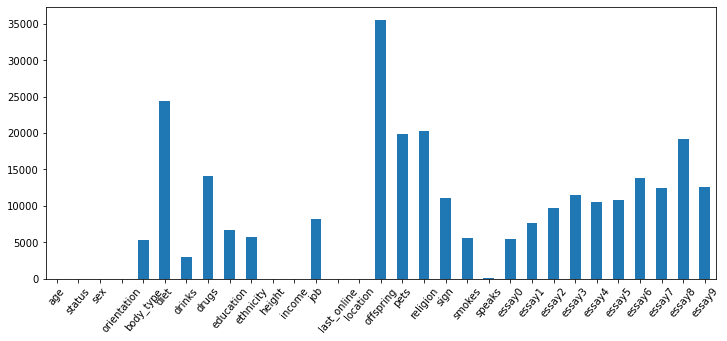

In [4]:
plt.figure(figsize=(12, 5))

data.isna().sum().plot(kind="bar")
plt.xticks(rotation=50)



## Formating and Cleaning Data

In [5]:
columns=["body_type",
      "diet", "education","drinks",
      "drugs","ethnicity",
      "job","offspring","pets","religion",
      "sign", "smokes", "speaks"
     ]
data[columns]=data[columns].fillna("No info")
data["height"]=data["height"].fillna(0)
data["income"]=data["income"].replace(-1, 0)

## Combining essays into 1 profile text
data["profile text"] = (data["essay0"]
    .str
    .cat(data.iloc[:,22:-1]
    .astype(str), sep=" "))

data=data.drop(data.iloc[:,21:-1], axis=1)
data["profile text"]=data["profile text"].fillna("No info")
data["Total Words"]=data["profile text"].str.split().str.len()


data.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile text,Total Words
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,420
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,271
2,38,available,m,straight,thin,anything,socially,No info,graduated from masters program,No info,...,2012-06-27-09-10,"san francisco, california",No info,has cats,No info,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...",819
3,23,single,m,straight,thin,vegetarian,socially,No info,working on college/university,white,...,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,No info,pisces,no,"english, german (poorly)",i work in a library and go to school. . . read...,74
4,29,single,m,straight,athletic,No info,socially,never,graduated from college/university,"asian, black, other",...,2012-06-27-21-26,"san francisco, california",No info,likes dogs and likes cats,No info,aquarius,no,english,hey how's it going? currently vague on the pro...,109


In [6]:
data.isna().sum() ## Double- Checking

age             0
status          0
sex             0
orientation     0
body_type       0
diet            0
drinks          0
drugs           0
education       0
ethnicity       0
height          0
income          0
job             0
last_online     0
location        0
offspring       0
pets            0
religion        0
sign            0
smokes          0
speaks          0
profile text    0
Total Words     0
dtype: int64

## General Statistics and Data Types

In [7]:
data.describe()

,age,height,income,Total Words
count,59946.000000,59946.000000,59946.000000,59946.000000
mean,32.340290,68.291863,20034.030628,323.728706
std,9.452779,4.023813,97346.025793,275.302965
min,18.000000,0.000000,0.000000,2.000000
25%,26.000000,66.000000,0.000000,138.000000
50%,30.000000,68.000000,0.000000,274.000000
75%,37.000000,71.000000,0.000000,445.000000
max,110.000000,95.000000,1000000.000000,9511.000000


 On average the age of profile's is 32 years old, with the income around 20 000$ (but it deviates a lot, so we can't really say that 



In [8]:
data.dtypes

age               int64
status           object
sex              object
orientation      object
body_type        object
diet             object
drinks           object
drugs            object
education        object
ethnicity        object
height          float64
income            int64
job              object
last_online      object
location         object
offspring        object
pets             object
religion         object
sign             object
smokes           object
speaks           object
profile text     object
Total Words       int64
dtype: object

5488 - empty profiles

In [9]:
data.corr().style.background_gradient()

,age,height,income,Total Words
age,1.000000,-0.022369,-0.001004,0.092346
height,-0.022369,1.000000,0.064753,0.004274
income,-0.001004,0.064753,1.000000,0.004966
Total Words,0.092346,0.004274,0.004966,1.000000


No significant correlation between age, height and income

## 1. Age


In [10]:
data.hvplot.hist("age")

:Histogram   [age]   (age_count)

In [11]:
df=(data
 .groupby("age")
    [["sex"]]
 .count()
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='age', y='number of participants', rot=90)


:Bars   [age]   (number of participants)

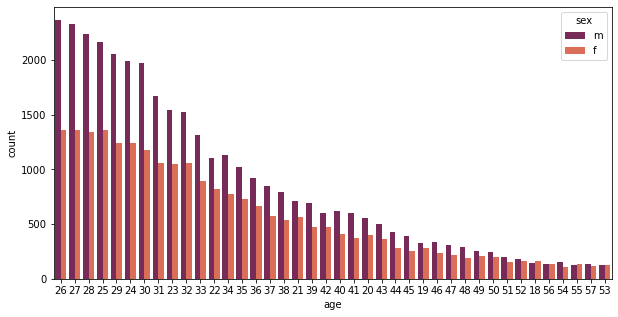

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=data,
hue='sex',palette="rocket",
order=data['age'].value_counts().iloc[:40].index);


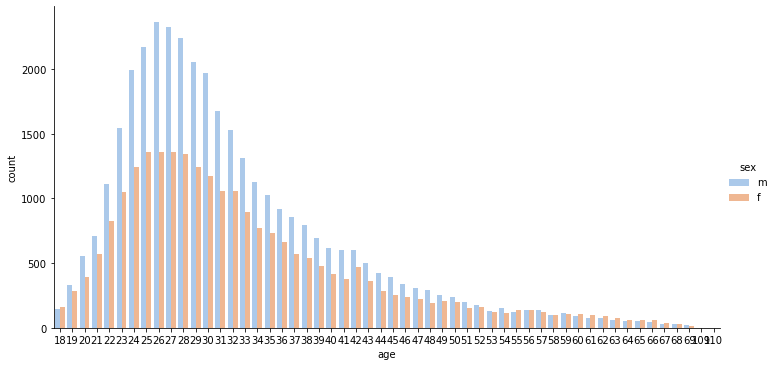

In [13]:
sns.catplot(x='age', data = data, kind='count', palette='pastel', hue='sex', 
            height=5, 
            aspect=2)

### Age and Total Number of Words in Profile

In [14]:
(data
 .groupby("age")
 [["Total Words"]]
 .mean()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x='age', y='Total Words', rot=90)


:Bars   [age]   (Total Words)

Mostly participants are between 25 and 30 years old

## 2. Status

In [15]:
df=(data
 .groupby("status")
    [["sex"]]
 .count()
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df


,number of participants,% of participants
status,,
available,1865,3.111133
married,310,0.517132
seeing someone,2064,3.443099
single,55697,92.911954
unknown,10,0.016682


In [16]:
df.hvplot.bar(x='status', y='number of participants', rot=90)


:Bars   [status]   (number of participants)

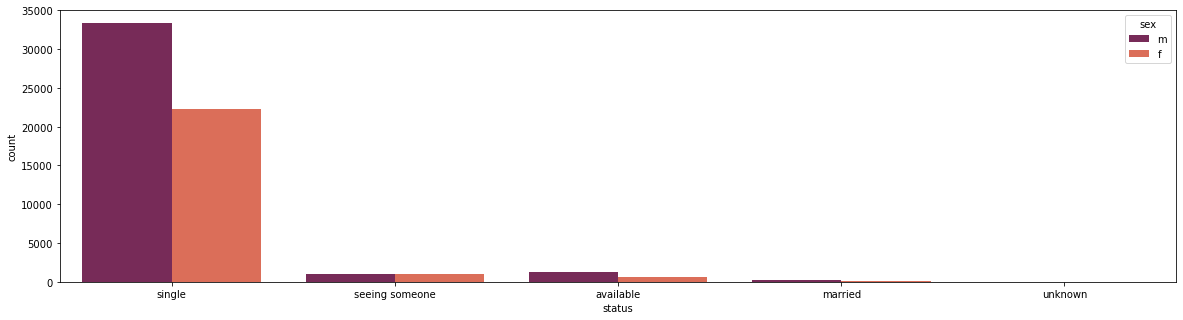

In [17]:
plt.figure(figsize=(20, 5))
sns.countplot(x='status', data=data,
hue='sex',palette="rocket",
order=data['status'].value_counts().iloc[:40].index);


In [18]:
(data
.groupby("status")
 [["Total Words"]]
 .mean()
).hvplot.bar(x="status", y="Total Words")

:Bars   [status]   (Total Words)

On Average avaivalable people write 500 words on their profile as we ll as the ones that seeing someone

## 3. Orientation

In [19]:
df=(data
 .groupby("orientation")
    [["sex"]]
 .count()
    .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df

,number of participants,% of participants
orientation,,
straight,51606,86.087479
gay,5573,9.296700
bisexual,2767,4.615821


In [20]:
df.hvplot.bar(x='orientation', y='number of participants', rot=90)


:Bars   [orientation]   (number of participants)

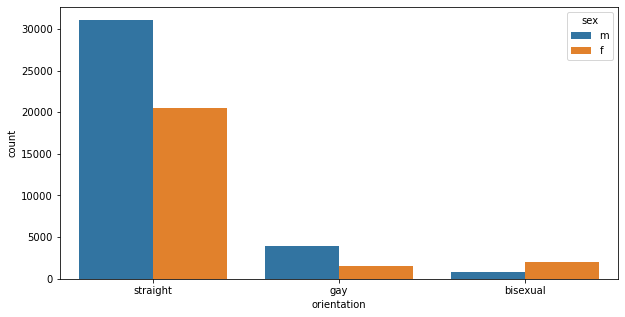

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='orientation', data=data,
hue='sex',
order=data['orientation'].value_counts().iloc[:10].index);


In [22]:
data['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [23]:
(data
.groupby("orientation")
 [["Total Words"]]
 .median()
).hvplot.bar(x="orientation", y="Total Words")

:Bars   [orientation]   (Total Words)

Bisexual has on average the most of the words in the profile, rather than gays or straights

## 4. Body Type

In [24]:
df=(data
 .groupby("body_type")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df

,number of participants,Total Words,% of participants
body_type,,,
average,14652,14652,24.441998
fit,12711,12711,21.204084
athletic,11819,11819,19.716078
No info,5296,5296,8.834618
thin,4711,4711,7.858740
curvy,3924,3924,6.545891
a little extra,2629,2629,4.385614
skinny,1777,1777,2.964335
full figured,1009,1009,1.683182


In [25]:
df.hvplot.bar(x='body_type', y='number of participants', rot=90)


:Bars   [body_type]   (number of participants)

In [26]:
df.hvplot.bar(x='body_type', y='Total Words', rot=90)


:Bars   [body_type]   (Total Words)

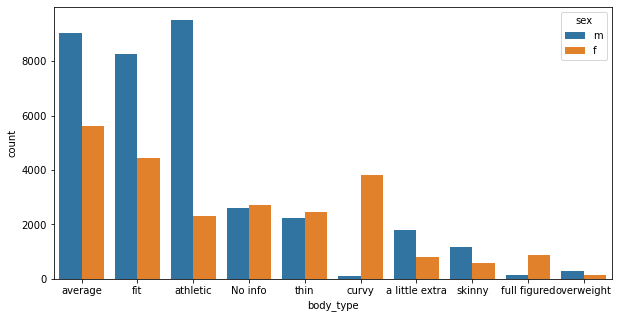

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='body_type', data=data,
hue='sex',
order=data['body_type'].value_counts().iloc[:10].index);


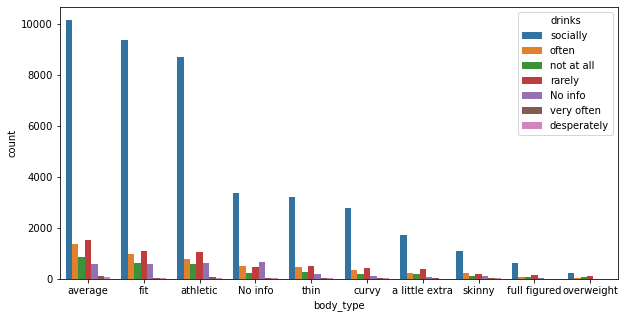

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='body_type', data=data,
hue='drinks',
order=data['body_type'].value_counts().iloc[:10].index);

## 5. Diet

In [29]:
df=(data
 .groupby("diet")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='diet', y='number of participants', rot=90)


:Bars   [diet]   (number of participants)

In [30]:
df

,number of participants,Total Words,% of participants
diet,,,
No info,24395,24395,40.694959
mostly anything,16585,16585,27.666567
anything,6183,6183,10.314283
strictly anything,5113,5113,8.529343
mostly vegetarian,3444,3444,5.745171
mostly other,1007,1007,1.679845
strictly vegetarian,875,875,1.459647
vegetarian,667,667,1.112668
strictly other,452,452,0.754012


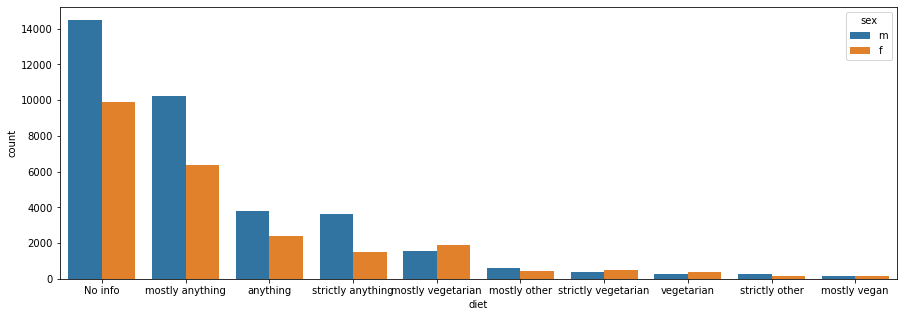

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(x='diet', data=data,
hue='sex',
order=data['diet'].value_counts().iloc[:10].index);

## 6. Drinks

In [32]:
df=(data
 .groupby("drinks")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='drinks', y='number of participants', rot=90)

:Bars   [drinks]   (number of participants)

In [33]:
df.hvplot.bar(x='drinks', y='Total Words', rot=90)

:Bars   [drinks]   (Total Words)

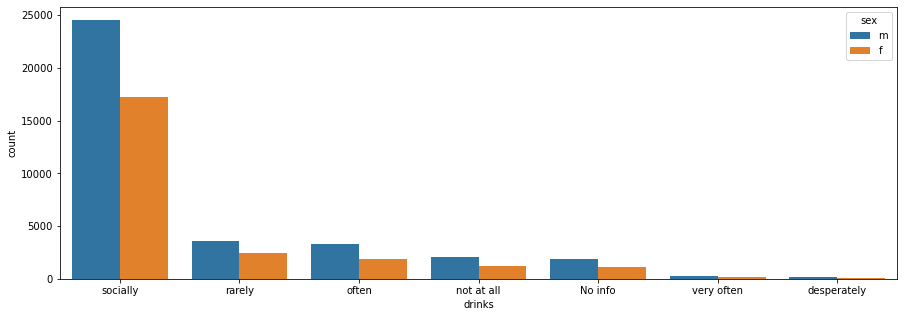

In [34]:
plt.figure(figsize=(15, 5))
sns.countplot(x='drinks', data=data,
hue='sex',
order=data['drinks'].value_counts().iloc[:10].index);

In [35]:
(data
.groupby("drinks")
 [["Total Words"]]
 .median()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x="drinks", y="Total Words")

:Bars   [drinks]   (Total Words)

## 8. Drugs

In [36]:
df=(data
 .groupby("drugs")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='drugs', y='number of participants', rot=90)

:Bars   [drugs]   (number of participants)

In [37]:
(data
.groupby("drugs")
 [["Total Words"]]
 .median()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x="drugs", y="Total Words")

:Bars   [drugs]   (Total Words)

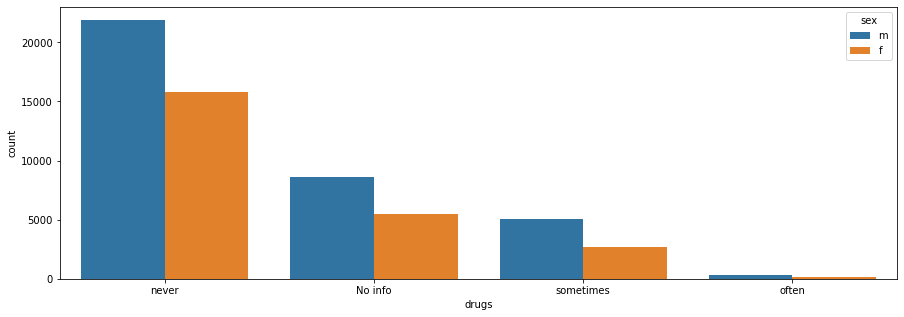

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x='drugs', data=data,
hue='sex',
order=data['drugs'].value_counts().iloc[:10].index);

## Income

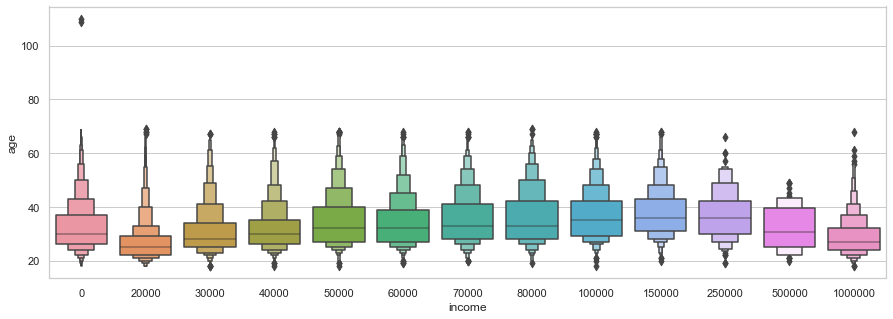

In [40]:
plt.figure(figsize=(15, 5))

sns.set_theme(style="whitegrid")

sns.boxenplot(x="income", y="age",
              data=data);

In [65]:
mask=data["income"]!=0
df=(data[mask]
 .groupby("income")
    [["sex", "Total Words"]]
 .count()
)

df=df.rename(columns= {"sex":"number of participants"})
#df.hvplot.bar(x='age', y='number of participants', rot=90)
df

,number of participants,Total Words
income,,
20000,2952,2952
30000,1048,1048
40000,1005,1005
50000,975,975
60000,736,736
70000,707,707
80000,1111,1111
100000,1621,1621
150000,631,631


In [66]:
df.hvplot.bar(x='income', y='Total Words', rot=90)


:Bars   [income]   (Total Words)

## 9. Education

In [43]:
df=(data
 .groupby("education")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='education', y='number of participants', rot=45)

:Bars   [education]   (number of participants)

## 10. Ethnicity

In [44]:
df=(data
 .groupby("ethnicity")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df

,number of participants,% of participants
ethnicity,,
white,32831,54.767624
asian,6134,10.232543
No info,5680,9.475194
hispanic / latin,2823,4.709238
black,2008,3.349681
...,...,...
"asian, native american, pacific islander, hispanic / latin, white, other",1,0.001668
"middle eastern, indian, white",1,0.001668
"black, native american, pacific islander, white, other",1,0.001668


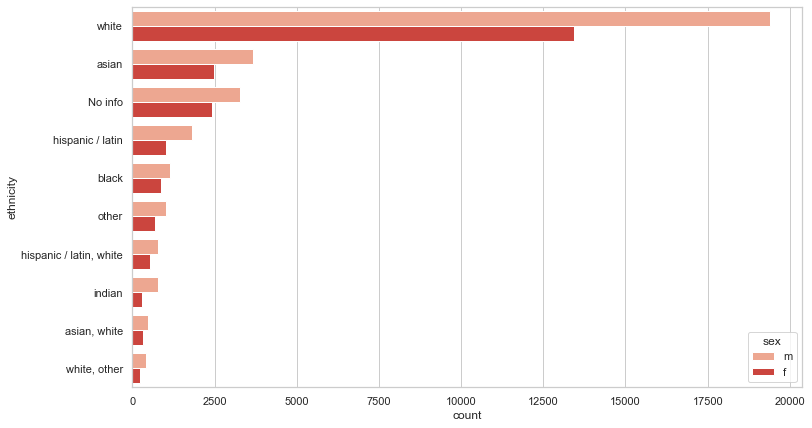

In [45]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ethnicity', data=data, hue="sex",
palette='Reds',
order = data['ethnicity'].value_counts().iloc[:10].index)
plt.show()

## 11. Height

In [46]:
df=(data
 .groupby("height")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='height', y='number of participants', rot=45)


:Bars   [height]   (number of participants)

In [47]:
data["height"].describe()

count    59946.000000
mean        68.291863
std          4.023813
min          0.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

## 12. Gender

In [48]:
df=(data
 .groupby("sex")
 [["age"]]
 .count()
)
df["% of participants, sex"]=(df["age"]/df["age"].sum())*100
df

,age,"% of participants, sex"
sex,,
f,24117,40.231208
m,35829,59.768792


In [49]:
(data
 .groupby("sex")
 [["age"]]
 .count()
)


,age
sex,
f,24117
m,35829


 We have 59 946 participants. 59% of them are men and 40% are women

## 13. Pets

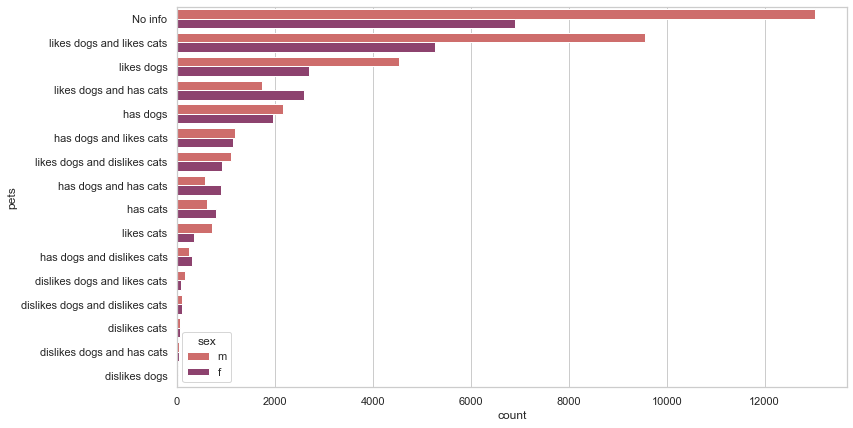

In [50]:
plt.figure(figsize=(12, 7))
sns.countplot(y = 'pets', data=data,
hue='sex', palette='flare',
order=data['pets'].value_counts().iloc[:].index)
plt.show()

## Q2: Words in the profile


## 1. Passion

In [51]:
passion=data[data["profile text"].str.contains("passion")]

df_p=(passion
.groupby("sex")
 [["sex"]]
 .count()
)

df_p["%"]=(df_p["sex"]/df_p["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_p

,sex,%
sex,,
f,4975,45.81%
m,5886,54.19%


In [52]:
len(passion)

10861

## 2. Love

In [53]:
love=data[data["profile text"].str.contains("love")]

df_l=(love
.groupby("sex")
 [["sex"]]
 .count()
)

df_l["%"]=(df_l["sex"]/df_l["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_l

,sex,%
sex,,
f,17956,45.05%
m,21906,54.95%


## 3. Relationship

In [54]:
rel=data[data["profile text"].str.contains("relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,3036,44.97%
m,3715,55.03%


## 4. Serious Relationship

In [55]:
rel=data[data["profile text"].str.contains("serious relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,114,45.97%
m,134,54.03%


## 5. Hookups

In [56]:
rel=data[data["profile text"].str.contains("hook*")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,8357,41.91%
m,11585,58.09%


## 6. Marriage

In [57]:
rel=data[data["profile text"].str.contains("marriage")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,269,47.78%
m,294,52.22%


## 7. Ons 

In [58]:
rel=data[data["profile text"].str.contains("ons")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,13420,40.59%
m,19645,59.41%
